## TL;DR — Project Overview

- Developed a **modular end-to-end ML pipeline** for churn prediction.  
- **Compared Logistic Regression and Random Forest models** via 5-fold cross-validation.  
- Evaluated performance using **ROC-AUC, precision-recall, confusion matrices, and feature importances**.  
- Identified **key churn drivers** (tenure, contract type, monthly charges, payment method).  
- Derived actionable **business recommendations** for retention strategies.

This notebook showcases the results of the analysis.

In [1]:
# Need to set up path for module imports
import os
import sys

sys.path.append(os.path.abspath(".."))

In [2]:
# import libraries and modules
import matplotlib.pyplot as plt
from src.data_validation import load_and_validate
from src.features import build_features
from src.train import train_models
from src.evaluate import plot_roc, plot_precision_recall, plot_confusion_matrix, print_classification_report, plot_feature_importance
from src.utils import print_results

In [3]:
df = load_and_validate("../data/Telco_Customer_Churn.csv")

print(f"Dataset shape after validation: {df.shape}")
df.info()
df.head()


Dataset shape after validation: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Target Distribution

Understanding class imbalance is critical when evaluating classification performance.

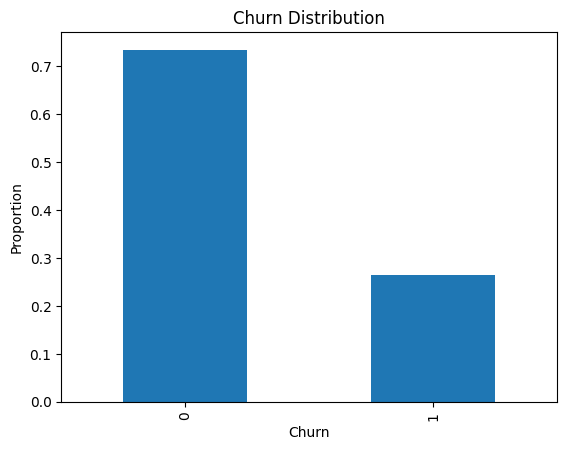

In [4]:
churn_counts = df["Churn"].value_counts(normalize=True)

churn_counts.plot(kind="bar")
plt.title("Churn Distribution")
plt.ylabel("Proportion")
plt.show()


~73% of customers will not churn and ~27% will.

## Feature Engineering

We transform raw features into model-ready inputs:
- Selection of numerical features only (to reduce dimensionality and focus on key predictors)
- Standardization for numerical variables

In [5]:
# Build and display feature matrix shape to 
# verify dimensionality. 
X, y = build_features(df, target_col="Churn")

print(f"Feature matrix shape: {X.shape}")


Feature matrix shape: (7043, 7072)


## Model Training & Performance Comparison

We compare a linear baseline with a non-linear ensemble model.

In [6]:
# Train models and collect results. 
# Details of model training are in src/train.py
models, results, X_test, y_test, predictions = train_models(X, y)

print_results(results)

Model Performance (ROC-AUC)
------------------------------
logistic_regression: 0.8450
random_forest: 0.8286


We see that LR and RF essentially perform as well as each other with LR scoring slightly better. 

This is mainly due to the linearity of the dataset. Typically LR performs well with linear datasets while RF works better with more non-linear datasets. However, the scores are roughly the same and both models perform sufficiently well.

This process can be utilized for more complex and non-linear datasets as well.


=== LOGISTIC_REGRESSION Evaluation ===


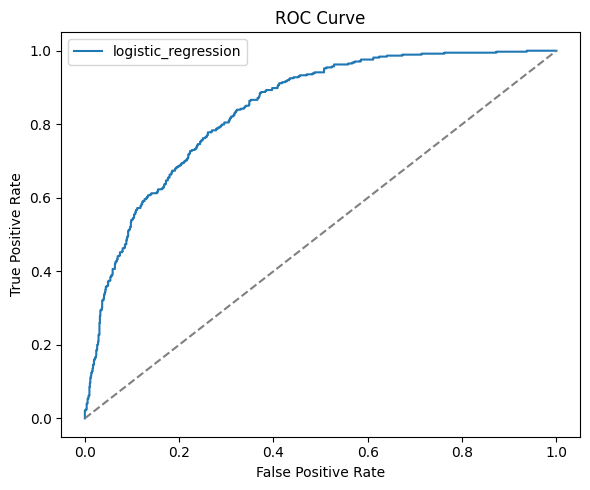

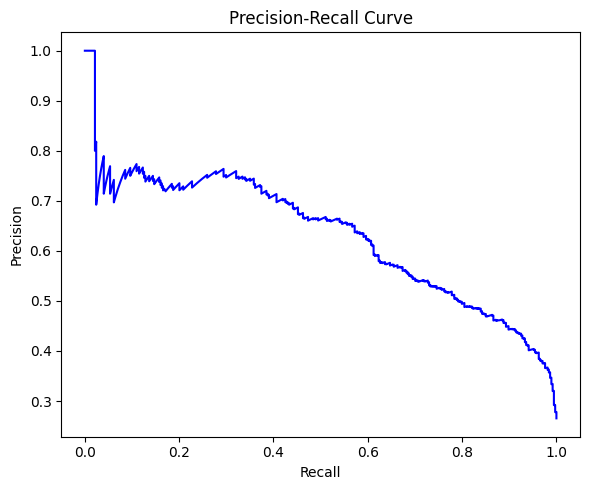

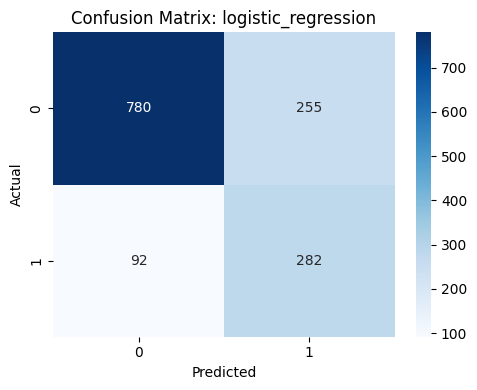

=== Classification Report: logistic_regression ===
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.77      1409

logistic_regression does not have feature importances.

=== RANDOM_FOREST Evaluation ===


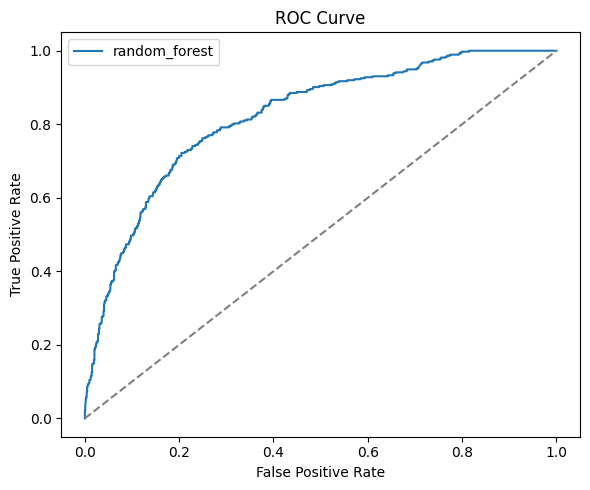

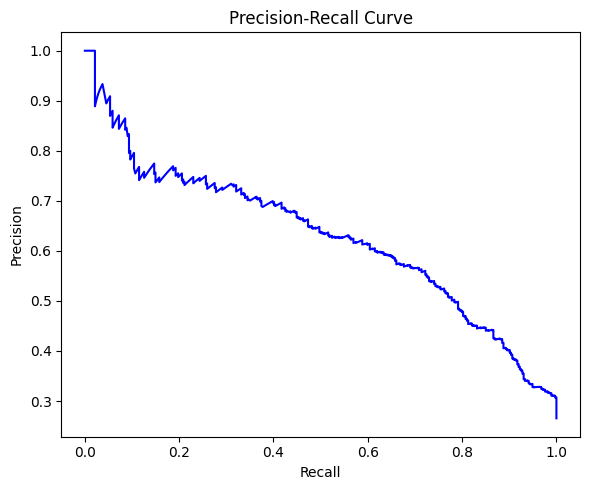

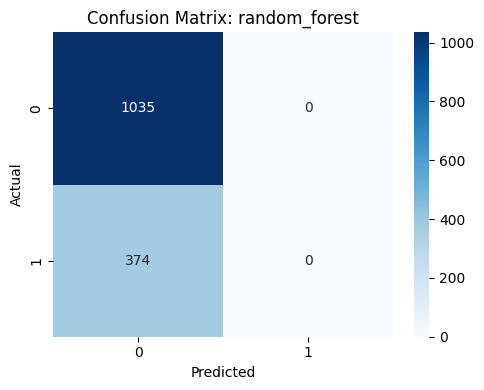

c:\Users\amana\hello\Python\End-To-End Churn Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\amana\hello\Python\End-To-End Churn Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\amana\hello\Python\End-To-End Churn Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

=== Classification Report: random_forest ===
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



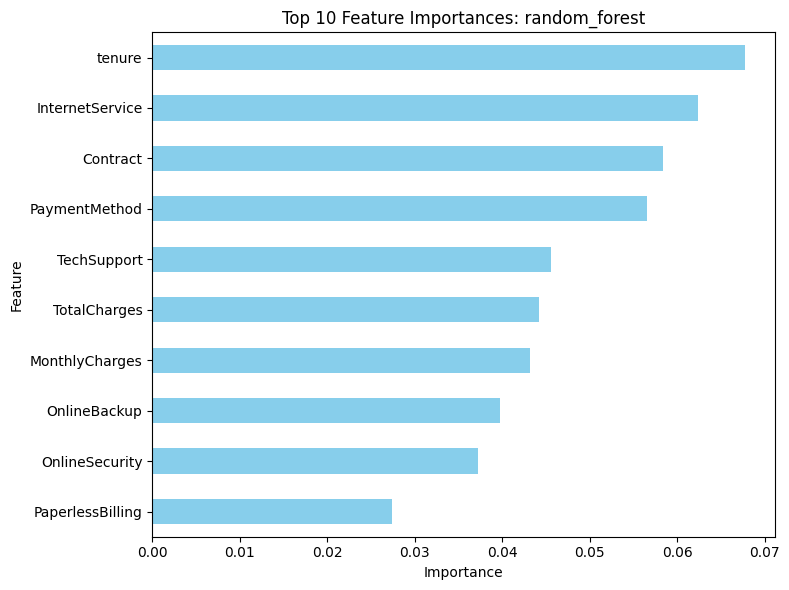

In [7]:
# Detailed Model Evaluation
for name, model in models.items():
    print(f"\n=== {name.upper()} Evaluation ===")

    
    y_pred = predictions[name]
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        # fallback: decision function for models like SVM
        y_prob = model.predict(X_test)
    
    # Plot evaluation metrics
    plot_roc(y_test, y_prob, label=name)
    plot_precision_recall(y_test, y_prob)
    plot_confusion_matrix(y_test, y_pred, name)
    print_classification_report(y_test, y_pred, name)

    # Plot readable feature importances (top 10)
    plot_feature_importance(model, X_test, name, top_n=10)


## Business Insights & Recommendations

- **Key Drivers:** Tenure, contract type, monthly charges, and payment method are the strongest predictors of churn.  
- **Retention Strategies:** Target high-risk customers using personalized offers (discounts, flexible contracts, service bundles). Focus interventions on the top 20% highest-risk customers.  
- **Potential Savings:** Assuming an average customer lifetime value of \$1,000, even a **5% reduction in churn** could lead to significant annual revenue gains.
